# 1. Problem Statement:
The problem at hand is to understand the characteristics of the target audience for each treadmill product offered by AeroFit. The goal is to provide better recommendations to new customers based on their profiles. In order to give prospective clients more accurate treadmill recommendations, AeroFit's market research team is trying to determine the traits of the target market for each model of treadmill that the firm offers. The dataset contains information on individuals who purchased treadmills from AeroFit stores in the last three months.<br> 
The company offers three key products - 
* The KP281 is an entry-level treadmill that sells for 1,500 dollars.
* The KP481 is for mid-level runners that sell for 1,750 dollars.
* The KP781 treadmill has advanced features that sell for 2,500 dollars.

**1.1 Importing the libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**1.2 Loading the dataset**

In [2]:
df = pd.read_csv("aerofit.csv")

**1.3 Checking the dataset**

In [3]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


# 2. Analysing basic metrics
* **Shape of data is (180, 9).**
* **Data types of all the attributes - There are 6 integer and 3 string attributes in the dataset.**
* **Name of attributes - Age, Gender, Education, Marital Status, Usage, Fitness, Income and Miles.**
* **There are 180 rows in the data.**
* **No null or missing values present in any row or column.**

**2.1 Checking the shape of the dataset**

In [4]:
df.shape

(180, 9)

**2.2 Checking the structure and characteristics of the dataset**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


**2.3 Summary statistics**

In [6]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [7]:
df.describe(include = "object")

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


**2.4 Product Distribution:** Using pandas.crosstab to determine the count of each treadmill product (KP281, KP481, KP781) in the dataset and calculating the percentage distribution of each product to understand the popularity.

### <u>Insight</u>: Top selling product is KP281 with 80 units sold which comprises 44.44% of total sales. Least selling product is KP781 with 40 units sold which comprises 22.22% of total sales. 

In [8]:
product_distribution = pd.crosstab(index=df['Product'], columns='count')
product_percentage_distribution = (product_distribution / len(df)) * 100

print("Product Distribution:")
print(product_distribution)
print("\nPercentage Distribution:")
print(product_percentage_distribution)

Product Distribution:
col_0    count
Product       
KP281       80
KP481       60
KP781       40

Percentage Distribution:
col_0        count
Product           
KP281    44.444444
KP481    33.333333
KP781    22.222222


**2.5 Average Age, Income, and Usage:** Computing basic metrics such as mean and median for Age, Income, and Usage to understand the central tendency.

In [9]:
average_age = df['Age'].mean()
median_age = df['Age'].median()

average_income = df['Income'].mean()
median_income = df['Income'].median()

average_usage = df['Usage'].mean()
median_usage = df['Usage'].median()

print(f"Average Age: {average_age:.2f}, Median Age: {median_age}")
print(f"Average Income: ${average_income:,.2f}, Median Income: ${median_income:,.2f}")
print(f"Average Usage: {average_usage:.2f}, Median Usage: {median_usage}")

Average Age: 28.79, Median Age: 26.0
Average Income: $53,719.58, Median Income: $50,596.50
Average Usage: 3.46, Median Usage: 3.0


**2.6 Gender Distribution:** Analyzing the distribution of gender to understand the gender representation in the dataset.

### <u>Insight</u>: 57.78% of our total customers are males and 42.22% are females.

In [10]:
gender_distribution = df['Gender'].value_counts()
gender_percentage_distribution = (gender_distribution / len(df)) * 100

print("Gender Distribution:")
print(gender_distribution)
print("\nPercentage Distribution:")
print(gender_percentage_distribution)

Gender Distribution:
Male      104
Female     76
Name: Gender, dtype: int64

Percentage Distribution:
Male      57.777778
Female    42.222222
Name: Gender, dtype: float64


**2.7 Education Level Distribution:** Explore the distribution of education levels to identify the educational background of customers.

### <u>Insight</u>: Majority of our customers are having moderate level of education.

In [11]:
education_distribution = df['Education'].value_counts()
education_percentage_distribution = (education_distribution / len(df)) * 100

print("Education Distribution:")
print(education_distribution)
print("\nPercentage Distribution:")
print(education_percentage_distribution)

Education Distribution:
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

Percentage Distribution:
16    47.222222
14    30.555556
18    12.777778
15     2.777778
13     2.777778
12     1.666667
21     1.666667
20     0.555556
Name: Education, dtype: float64


# 3. Non-Graphical Analysis: Value counts and unique attributes 

**3.1 Value counts and unique attributes of Product column**

### <u>Insight</u>: Top selling product is KP281 with sales of 80 units, whereas 60 units of KP481 and 40 units of KP781 were sold. 

In [12]:
print("Total count of Product:")
print(df["Product"].value_counts())

print("\nUnique attributes of Product:")  
print(df["Product"].unique())

Total count of Product:
KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

Unique attributes of Product:
['KP281' 'KP481' 'KP781']


**3.2 Value counts and unique attributes of Age column**

### <u>Insight</u>: Most number of purchases are made by customers which fall under age range of 23 - 26.

In [13]:
print("Total count of Age:")
print(df["Age"].value_counts())

print("\nUnique attributes of Age:")  
print(df["Age"].unique())

Total count of Age:
25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: Age, dtype: int64

Unique attributes of Age:
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]


**3.3 Value counts and unique attributes of Gender column**

### <u>Insight</u>: Most number of purchases is made by male customers.

In [14]:
print("Total count of Gender:")
print(df["Gender"].value_counts())

print("\nUnique attributes of Gender:")  
print(df["Gender"].unique())

Total count of Gender:
Male      104
Female     76
Name: Gender, dtype: int64

Unique attributes of Gender:
['Male' 'Female']


**3.4 Value counts and unique attributes of Education column**

### <u>Insight</u>: Most number of purchases is made by customers who have moderate to high level of education.

In [15]:
print("Total count of Education:")
print(df["Education"].value_counts())

print("\nUnique attributes of Education:")  
print(df["Education"].unique())

Total count of Education:
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

Unique attributes of Education:
[14 15 12 13 16 18 20 21]


**3.5 Value counts and unique attributes of MaritalStatus column**

### <u>Insight</u>: Most number of purchases is made by customers who are married.

In [16]:
print("Total count of MaritalStatus:")
print(df["MaritalStatus"].value_counts())

print("\nUnique attributes of MaritalStatus:")  
print(df["MaritalStatus"].unique())

Total count of MaritalStatus:
Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

Unique attributes of MaritalStatus:
['Single' 'Partnered']


**3.6 Value counts and unique attributes of Usage column**

### <u>Insight</u>: Most of our customers intend to use treadmill 3 - 4 times a week.

In [17]:
print("Total count of Usage:")
print(df["Usage"].value_counts())

print("\nUnique attributes of Usage:")  
print(df["Usage"].unique())

Total count of Usage:
3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

Unique attributes of Usage:
[3 2 4 5 6 7]


**3.7 Value counts and unique attributes of Fitness column**

### <u>Insight</u>: Most of our customers have moderate level of fitness.

In [18]:
print("Total count of Fitness:")
print(df["Fitness"].value_counts())

print("\nUnique attributes of Fitness:")  
print(df["Fitness"].unique())

Total count of Fitness:
3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

Unique attributes of Fitness:
[4 3 2 1 5]


**3.8 Value counts and unique attributes of Income column**

### <u>Insight</u>: Most of our customers fall in 40,000 - 60,000 dollars annual income bracket.

In [19]:
print("Total count of Income:")
print(df["Income"].value_counts())

print("\nUnique attributes of Income:")  
print(df["Income"].unique())

Total count of Income:
45480    14
52302     9
46617     8
54576     8
53439     8
         ..
65220     1
55713     1
68220     1
30699     1
95508     1
Name: Income, Length: 62, dtype: int64

Unique attributes of Income:
[ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  53536  61006
  57271  52291  49801  62251  64741  70966  75946  74701  69721  83416
  88396  90886  92131  77191  52290  85906 103336  99601  89641  95866
 104581  95508]


**3.9 Value counts and unique attributes of Miles column**

### <u>Insight</u>: Most of our customers intend to use walk/run 75 - 85 number of miles each week.

In [20]:
print("Total count of Miles:")
print(df["Miles"].value_counts())

print("\nUnique attributes of Miles:")  
print(df["Miles"].unique())

Total count of Miles:
85     27
95     12
66     10
75     10
47      9
106     9
94      8
113     8
53      7
100     7
180     6
200     6
56      6
64      6
127     5
160     5
42      4
150     4
38      3
74      3
170     3
120     3
103     3
132     2
141     2
280     1
260     1
300     1
240     1
112     1
212     1
80      1
140     1
21      1
169     1
188     1
360     1
Name: Miles, dtype: int64

Unique attributes of Miles:
[112  75  66  85  47 141 103  94 113  38 188  56 132 169  64  53 106  95
 212  42 127  74 170  21 120 200 140 100  80 160 180 240 150 300 280 260
 360]


# 4. Visual Analysis - Univariate & Bivariate

**4.1 Checking the effect of Marital Status on the product purchased**

### <u>Insight</u>: Most number of purchases (all three products) is made by married customers.

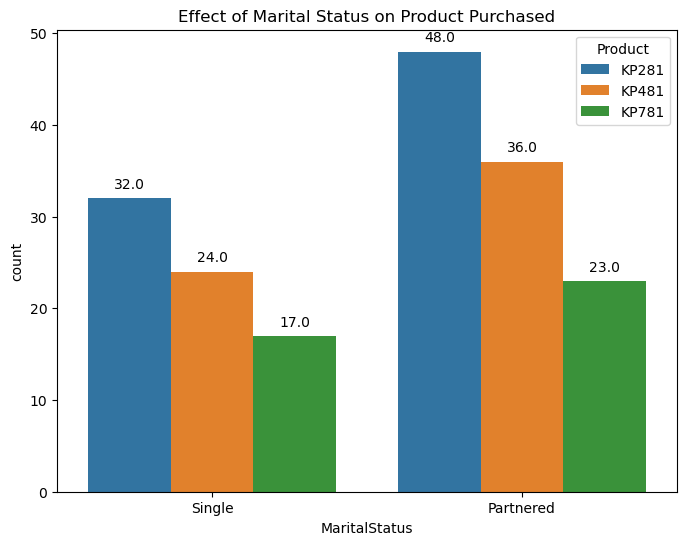

In [23]:
plt.figure(figsize=(8, 6))

# Countplot for Marital Status and Product Purchased
ax = sns.countplot(x='MaritalStatus', hue='Product', data=df)
plt.title('Effect of Marital Status on Product Purchased')

# Annotate bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

**4.2 Checking the effect of Age on the product purchased**

### <u>Insight</u>: Most number of purchases (all three products) is made by customers aged between 20 - 35 years.

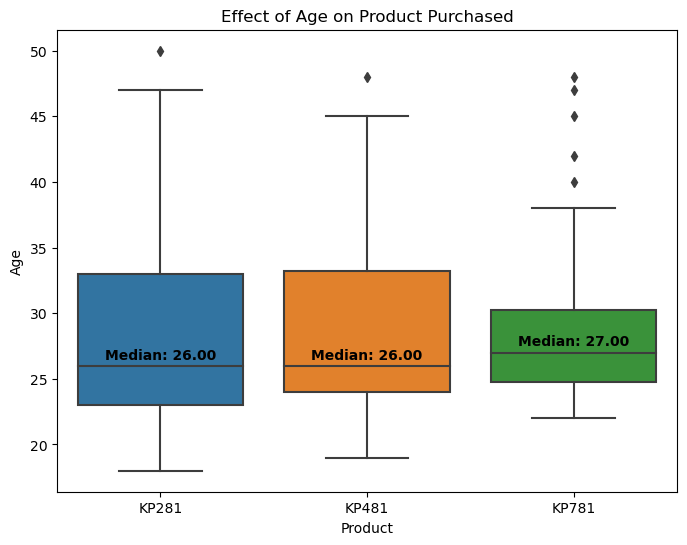

In [24]:
plt.figure(figsize=(8, 6))

# Boxplot for Age and Product Purchased
ax = sns.boxplot(x='Product', y='Age', data=df)
plt.title('Effect of Age on Product Purchased')

# Annotate median
for product in df['Product'].unique():
    box_data = df[df['Product'] == product]['Age']
    median = box_data.median()
    
    vertical_offset = ax.get_ylim()[1] * 0.01  # adjust this based on your preference
    
    ax.text(df['Product'].unique().tolist().index(product), median + vertical_offset,
            f'Median: {median:.2f}', horizontalalignment='center', color='black', weight='semibold')

plt.show()

**4.3 Checking the effect of Income on the product purchased**

### <u>Insight</u>: Most of our KP281 and KP481 customers fall in 40,000 - 55,000 dollars annual income bracket. Most of our KP781 customers fall in 60,000 - 90,000 dollars annual income bracket.

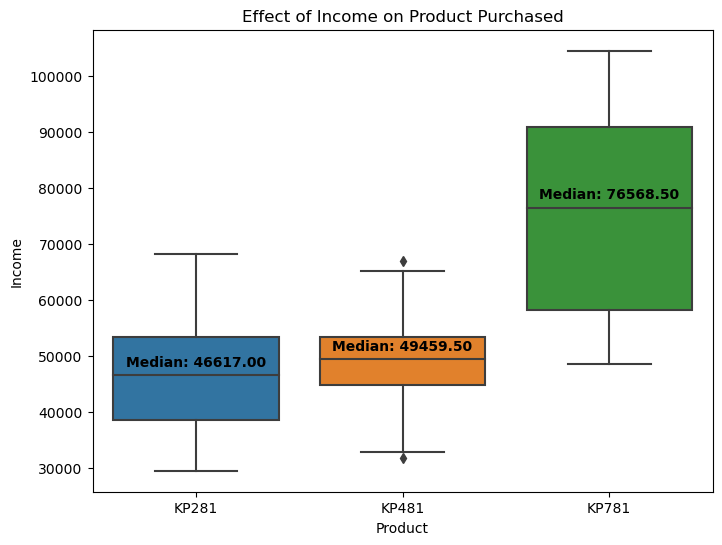

In [25]:
plt.figure(figsize=(8, 6))

# Boxplot for Income and Product Purchased
ax = sns.boxplot(x='Product', y='Income', data=df)
plt.title('Effect of Income on Product Purchased')

# Annotate median
for product in df['Product'].unique():
    box_data = df[df['Product'] == product]['Income']
    median = box_data.median()
    
    vertical_offset = ax.get_ylim()[1] * 0.015  # adjust this based on your preference
    
    ax.text(df['Product'].unique().tolist().index(product), median + vertical_offset,
            f'Median: {median:.2f}', horizontalalignment='center', color='black', weight='semibold')


plt.show()

**4.4 Checking the effect of Education on the product purchased**

### <u>Insight</u>: For KP281 and KP481 our customer's education level is moderate. For KP781 our customer's education level is moderate to high.

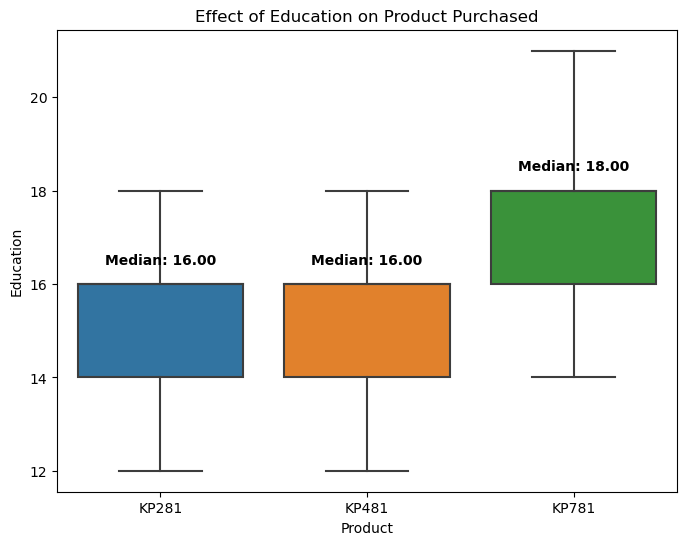

In [59]:
plt.figure(figsize=(8, 6))

# Boxplot for Education and Product Purchased
ax = sns.boxplot(x='Product', y='Education', data=df)
plt.title('Effect of Education on Product Purchased')

# Annotate median
for product in df['Product'].unique():
    box_data = df[df['Product'] == product]['Education']
    median = box_data.median()
    
    vertical_offset = ax.get_ylim()[1] * 0.02  # adjust this based on your preference
    
    ax.text(df['Product'].unique().tolist().index(product), median + vertical_offset,
            f'Median: {median:.2f}', horizontalalignment='center', color='black', weight='semibold')

plt.show()

**4.5 Univariate Plots - Age Distribution**

### <u>Insight</u>: Most number of purchases (all three products) is made by customers aged between 20 - 35 years. Average age of our customers is 26 years.

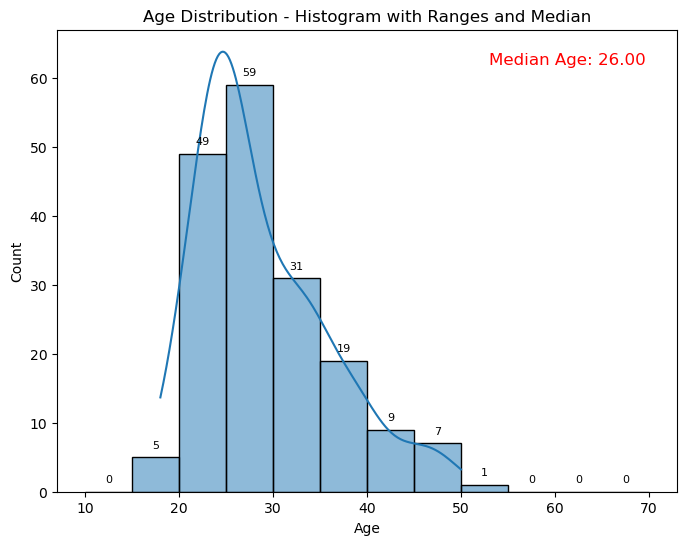

In [67]:
plt.figure(figsize=(8, 6))
bins = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
ax = sns.histplot(df['Age'], bins=bins, kde=True)

# Annotate bars with counts
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 5), textcoords='offset points',
                ha='center', va='bottom', fontsize=8)

# Annotate histogram
median_age = df['Age'].median()

# Display median in the top right corner
plt.text(0.95, 0.95, f'Median Age: {median_age:.2f}', transform=ax.transAxes,
         fontsize=12, color='red', ha='right', va='top')

plt.title('Age Distribution - Histogram with Ranges and Median')
plt.show()

**4.6 Univariate Plots - Income Distribution**

### <u>Insight</u>: Most number of purchases (all three products) is made by customers who fall under 35,000 - 65,000 dollars annual income bracket. Average annual income of our customers is 50,596.5 dollars.

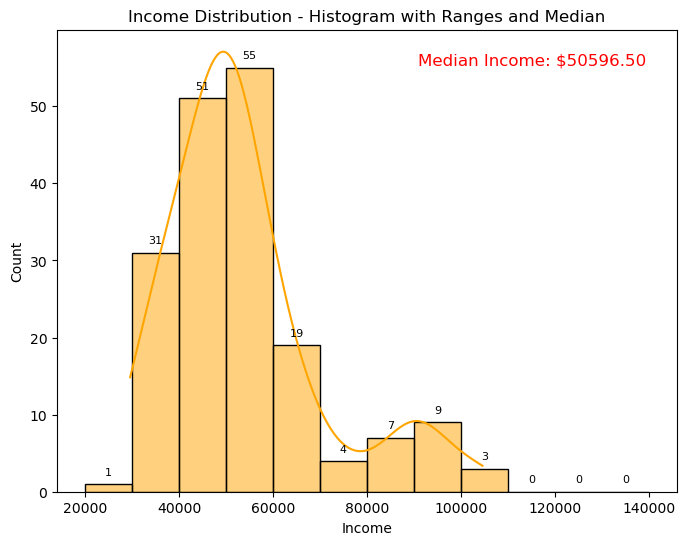

In [73]:
plt.figure(figsize=(8, 6))
income_bins = [20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000]
ax = sns.histplot(df['Income'], bins=income_bins, kde=True, color='orange')

# Annotate bars with counts
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 5), textcoords='offset points',
                ha='center', va='bottom', fontsize=8)

# Annotate histogram
median_income = df['Income'].median()

# Display median in the top right corner
plt.text(0.95, 0.95, f'Median Income: ${median_income:.2f}', transform=ax.transAxes,
         fontsize=12, color='red', ha='right', va='top')

plt.title('Income Distribution - Histogram with Ranges and Median')
plt.show()

**4.7 Univariate Plots - Fitness Distribution**

### <u>Insight</u>: Most number of purchases (all three products) is made by customers who have moderate level of fitness.

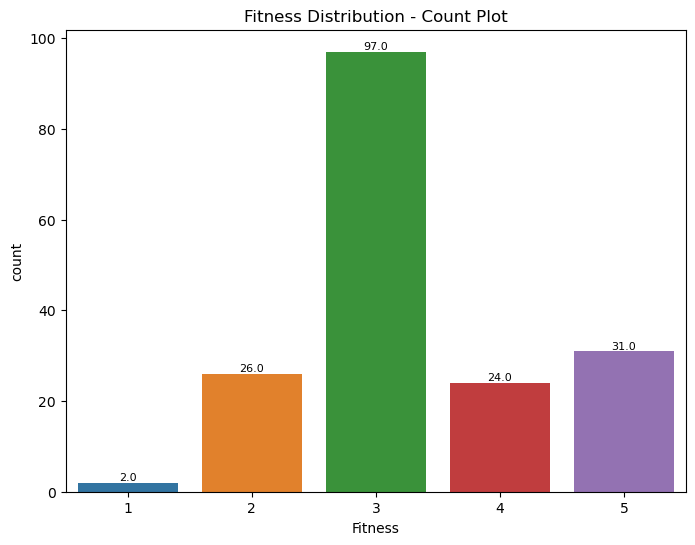

In [29]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Fitness', data=df)

# Annotate each bar with counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=8, color='black')

plt.title('Fitness Distribution - Count Plot')
plt.show()

**4.8 Bivariate Plots - Age vs. Income**

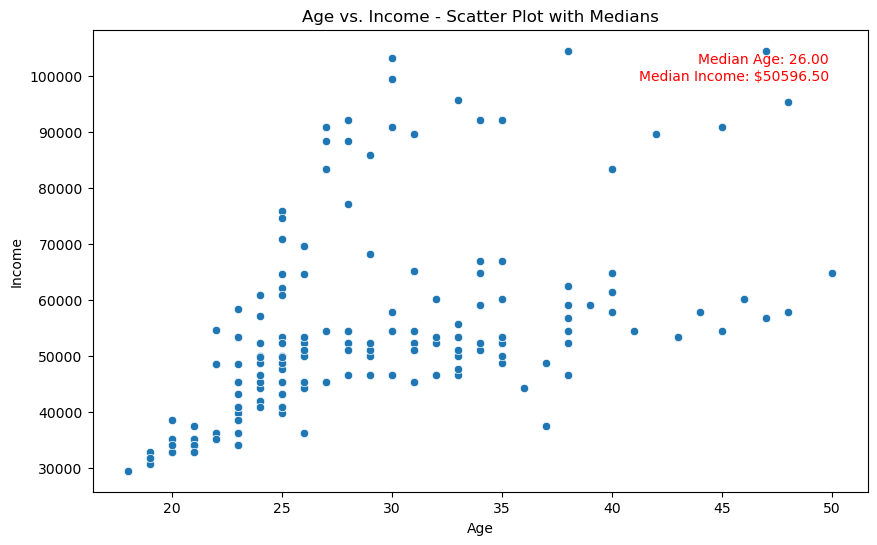

In [72]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Income', data=df)

# Median age and income
median_age = df['Age'].median()
median_income = df['Income'].median()

# Display medians in the top right corner
plt.text(0.95, 0.95, f'Median Age: {median_age:.2f}\nMedian Income: ${median_income:.2f}',
         transform=plt.gca().transAxes, fontsize=10, color='red', ha='right', va='top')

plt.title('Age vs. Income - Scatter Plot with Medians')
plt.show()

**4.9 Bivariate Plots - Product vs. Usage**

### <u>Insight</u>: For KP281 our customers are mostly casual users. For KP481 our customers are mostly active to maderate users. For KP781 our customers are mostly athletes or active fitness enthusiasts. 

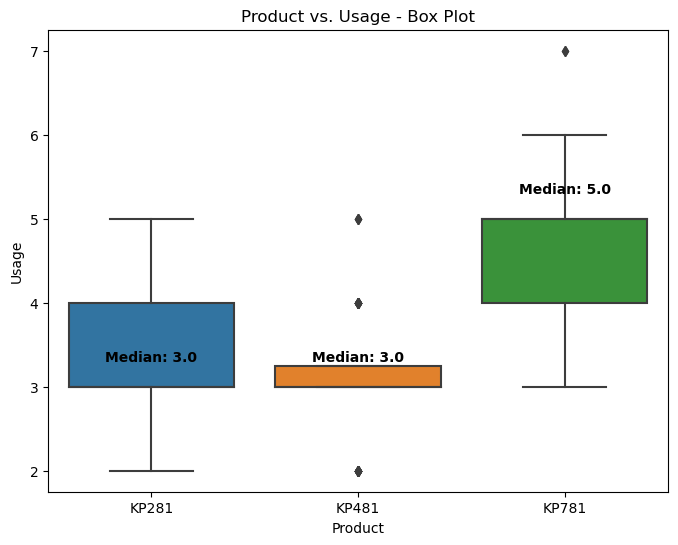

In [31]:
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='Product', y='Usage', data=df)

# Annotate median usage for each box
medians = df.groupby('Product')['Usage'].median()
vertical_offset = df['Usage'].median() * 0.1  # adjust this value for vertical spacing
for xtick, median in zip(ax.get_xticks(), medians):
    ax.text(xtick, median + vertical_offset, f'Median: {median}', 
            horizontalalignment='center', color='black', weight='bold')

plt.title('Product vs. Usage - Box Plot')
plt.show()

**4.10 Bivariate Plots - Gender vs. Fitness**

### <u>Insight</u>: Most of our customers have moderate level of fitness regardless of gender.

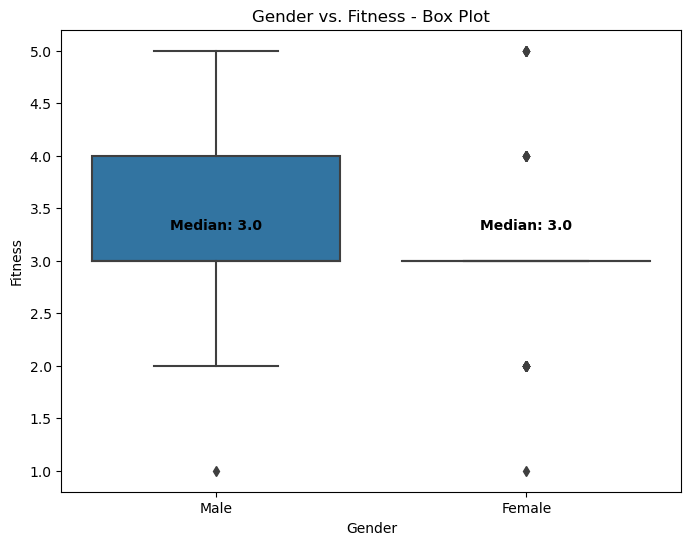

In [32]:
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='Gender', y='Fitness', data=df)

# Annotate median usage for each box
medians = df.groupby('Product')['Usage'].median()
vertical_offset = df['Usage'].median() * 0.1  # adjust this value for vertical spacing
for xtick, median in zip(ax.get_xticks(), medians):
    ax.text(xtick, median + vertical_offset, f'Median: {median}', 
            horizontalalignment='center', color='black', weight='bold')

plt.title('Gender vs. Fitness - Box Plot')
plt.show()

**4.11 Checking Correlation among Different Factors**

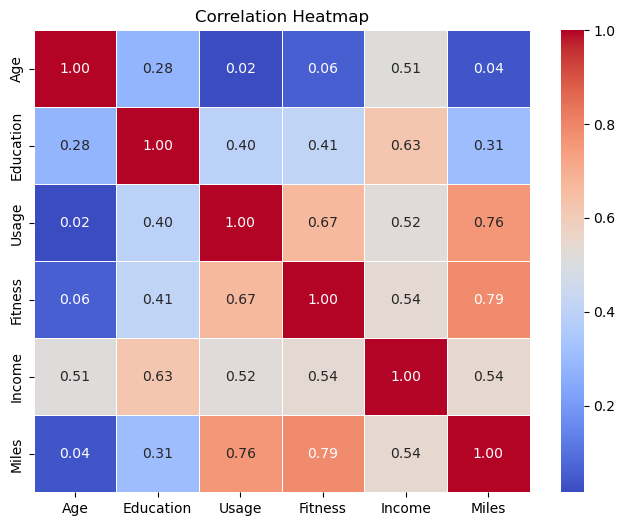

In [33]:
# Calculate correlation matrix for numeric columns
numeric_columns = df.select_dtypes(include='number').columns
correlation_matrix = df[numeric_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# 5. Marginal and Conditional Probability

**5.1 Marginal probability is the probability of a single event without considering any other events. In this case, we have calculated the:**

* Marginal Probability of each product being purchased - P(KP281), P(K4281), P(KP781)
* Marginal Probability of marital status - P(married), P(single)
* Marginal Probability of education 
* Marginal Probability of fitness

In [34]:
# Marginal Probability of each product being purchased
marginal_prob_product = df['Product'].value_counts(normalize=True)
print("\nMarginal Probability of each product being purchased:")
print(marginal_prob_product)

# Marginal Probability of MaritalStatus
marginal_prob_marital = df['MaritalStatus'].value_counts(normalize=True)
print("\n\nMarginal Probability of MaritalStatus:")
print(marginal_prob_marital)

# Marginal Probability of education
marginal_prob_education = df['Education'].value_counts(normalize=True)
print("\n\nMarginal Probability of education:")
print(marginal_prob_education)

# Marginal Probability of fitness
marginal_prob_fitness = df['Fitness'].value_counts(normalize=True)
print("\n\nMarginal Probability of fitness:")
print(marginal_prob_fitness)


Marginal Probability of each product being purchased:
KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64


Marginal Probability of MaritalStatus:
Partnered    0.594444
Single       0.405556
Name: MaritalStatus, dtype: float64


Marginal Probability of education:
16    0.472222
14    0.305556
18    0.127778
15    0.027778
13    0.027778
12    0.016667
21    0.016667
20    0.005556
Name: Education, dtype: float64


Marginal Probability of fitness:
3    0.538889
5    0.172222
2    0.144444
4    0.133333
1    0.011111
Name: Fitness, dtype: float64


**5.2 Conditional probability is the probability of an event occurring given that another event has already occurred. In this case, we have calculated the:**

* Conditional Probability of purchasing each product given the gender - P(KP281 | male), P(KP281 | female), P(KP481 | male), P(KP481 | female), <br> P(KP781 | male), P(KP781 | female)
* Conditional Probability of purchasing each product given marital status - P(KP281 | married), P(KP281 | single), P(KP481 | married), P(KP481 | single), P(KP781 | married), P(KP281 | single)
* Conditional Probability of purchasing each product given education
* Conditional Probability of purchasing each product given fitness

In [35]:
# Conditional Probability of purchasing each product given gender
conditional_prob_gender_product = pd.crosstab(index=df['Gender'], columns=df['Product'], normalize='index')
print("\nConditional Probability of purchasing each product given gender:")
print(conditional_prob_gender_product)

# Conditional Probability of purchasing each product given marital status
conditional_prob_marital_product = pd.crosstab(index=df['MaritalStatus'], columns=df['Product'], normalize='index')
print("\n\nConditional Probability of purchasing each product given marital status:")
print(conditional_prob_marital_product)

# Conditional Probability of purchasing each product given education
conditional_prob_education_product = pd.crosstab(index=df['Education'], columns=df['Product'], normalize='index')
print("\n\nConditional Probability of purchasing each product given education:")
print(conditional_prob_education_product)

# Conditional Probability of purchasing each product given fitness
conditional_prob_fitness_product = pd.crosstab(index=df['Fitness'], columns=df['Product'], normalize='index')
print("\n\nConditional Probability of purchasing each product given fitness status:")
print(conditional_prob_fitness_product)


Conditional Probability of purchasing each product given gender:
Product     KP281     KP481     KP781
Gender                               
Female   0.526316  0.381579  0.092105
Male     0.384615  0.298077  0.317308


Conditional Probability of purchasing each product given marital status:
Product           KP281     KP481     KP781
MaritalStatus                              
Partnered      0.448598  0.336449  0.214953
Single         0.438356  0.328767  0.232877


Conditional Probability of purchasing each product given education:
Product       KP281     KP481     KP781
Education                              
12         0.666667  0.333333  0.000000
13         0.600000  0.400000  0.000000
14         0.545455  0.418182  0.036364
15         0.800000  0.200000  0.000000
16         0.458824  0.364706  0.176471
18         0.086957  0.086957  0.826087
20         0.000000  0.000000  1.000000
21         0.000000  0.000000  1.000000


Conditional Probability of purchasing each product given fi

**5.3 For each AeroFit treadmill product, we have constructed two-way contingency tables and computed all conditional and marginal probabilities**

In [36]:
# Contingency table for Product KP281
contingency_table_KP281 = pd.crosstab(index = df['Gender'], 
                                      columns = df['MaritalStatus'], 
                                      margins = True, 
                                      margins_name = 'Total')
conditional_prob_KP281 = contingency_table_KP281 / contingency_table_KP281.loc['Total', 'Total']

# Contingency table for Product KP481
contingency_table_KP481 = pd.crosstab(index = df['Gender'], 
                                      columns = df['MaritalStatus'], 
                                      margins = True, 
                                      margins_name = 'Total')
conditional_prob_KP481 = contingency_table_KP481 / contingency_table_KP481.loc['Total', 'Total']

# Contingency table for Product KP781
contingency_table_KP781 = pd.crosstab(index = df['Gender'], 
                                      columns = df['MaritalStatus'], 
                                      margins = True, 
                                      margins_name = 'Total')
conditional_prob_KP781 = contingency_table_KP781 / contingency_table_KP781.loc['Total', 'Total']

# Display results for KP281
print("Conditional Probabilities for KP281:")
print(conditional_prob_KP281)
print("\nMarginal Probabilities for KP281:")
print(contingency_table_KP281 / len(df))  # Marginal probabilities

# Display results for KP481
print("\nConditional Probabilities for KP481:")
print(conditional_prob_KP481)
print("\nMarginal Probabilities for KP481:")
print(contingency_table_KP481 / len(df))  # Marginal probabilities

# Display results for KP781
print("\nConditional Probabilities for KP781:")
print(conditional_prob_KP781)
print("\nMarginal Probabilities for KP781:")
print(contingency_table_KP781 / len(df))  # Marginal probabilities

Conditional Probabilities for KP281:
MaritalStatus  Partnered    Single     Total
Gender                                      
Female          0.255556  0.166667  0.422222
Male            0.338889  0.238889  0.577778
Total           0.594444  0.405556  1.000000

Marginal Probabilities for KP281:
MaritalStatus  Partnered    Single     Total
Gender                                      
Female          0.255556  0.166667  0.422222
Male            0.338889  0.238889  0.577778
Total           0.594444  0.405556  1.000000

Conditional Probabilities for KP481:
MaritalStatus  Partnered    Single     Total
Gender                                      
Female          0.255556  0.166667  0.422222
Male            0.338889  0.238889  0.577778
Total           0.594444  0.405556  1.000000

Marginal Probabilities for KP481:
MaritalStatus  Partnered    Single     Total
Gender                                      
Female          0.255556  0.166667  0.422222
Male            0.338889  0.238889  0.577778


**5.4 What is P(Single | KP281) i.e. product bought is KP281 what is the probability that this person is single?**

In [70]:
df[df.Product == "KP281"]["MaritalStatus"].value_counts(normalize = True)

Partnered    0.6
Single       0.4
Name: MaritalStatus, dtype: float64

**5.5 What is P(Single | KP481) i.e. product bought is KP481 what is the probability that this person is single?**

In [71]:
df[df.Product == "KP481"]["MaritalStatus"].value_counts(normalize = True)

Partnered    0.6
Single       0.4
Name: MaritalStatus, dtype: float64

**5.6 What is P(Single | KP781) i.e. product bought is KP781 what is the probability that this person is single?**

In [72]:
df[df.Product == "KP781"]["MaritalStatus"].value_counts(normalize = True)

Partnered    0.575
Single       0.425
Name: MaritalStatus, dtype: float64

**5.7 What is P(Purchase | Male) i.e. for each product bought what is the probability that a male buys it?**

In [79]:
df[df.Gender=="Male"]["Product"].value_counts(normalize = True)

KP281    0.384615
KP781    0.317308
KP481    0.298077
Name: Product, dtype: float64

**5.8 What is P(Purchase | Female) i.e. for each product bought what is the probability that a female buys it?**

In [80]:
df[df.Gender == "Female"]["Product"].value_counts(normalize = True)

KP281    0.526316
KP481    0.381579
KP781    0.092105
Name: Product, dtype: float64

**5.9 Probability of a Male and Female Customers Buying a KP281 Treadmill**

### <u>Insight</u>: P(male buying KP281) = 0.38. P(female buying KP281) = 0.53. We note that there are very high chances that a female will buy KP281 as compared to KP481 and KP781.

In [76]:
male_kp281_prob = df[(df['Gender'] == 'Male') & (df['Product'] == 'KP281')].shape[0] / df[df['Gender'] == 'Male'].shape[0]
female_kp281_prob = df[(df['Gender'] == 'Female')&(df['Product'] == 'KP281')].shape[0]/df[df['Gender'] == 'Female'].shape[0]

print(f"\nProbability of a Male customer buying a KP281 treadmill: {male_kp281_prob:.2f}")
print(f"Probability of a Female customer buying a KP281 treadmill: {female_kp281_prob:.2f}")


Probability of a Male customer buying a KP281 treadmill: 0.38
Probability of a Female customer buying a KP281 treadmill: 0.53


**5.10 Probability of a Male and Female Customer Buying a KP481 Treadmill**

### <u>Insight</u>: P(male buying KP481) = 0.30. P(female buying KP481) = 0.38.

In [75]:
male_kp481_prob = df[(df['Gender'] == 'Male') & (df['Product'] == 'KP481')].shape[0] / df[df['Gender'] == 'Male'].shape[0]
female_kp481_prob = df[(df['Gender'] == 'Female')&(df['Product'] == 'KP481')].shape[0]/df[df['Gender'] == 'Female'].shape[0]

print(f"\nProbability of a Male customer buying a KP481 treadmill: {male_kp481_prob:.2f}")
print(f"Probability of a Female customer buying a KP481 treadmill: {female_kp481_prob:.2f}")


Probability of a Male customer buying a KP481 treadmill: 0.30
Probability of a Female customer buying a KP481 treadmill: 0.38


**5.11 Probability of a Male and Female Customer Buying a KP781 Treadmill**

### <u>Insight</u>: P(male buying KP781) = 0.32. P(female buying KP781) = 0.09. We note that there are very less chances that a female will buy KP781 as compared to KP281 and KP481.

In [74]:
male_kp781_prob = df[(df['Gender'] == 'Male') & (df['Product'] == 'KP781')].shape[0] / df[df['Gender'] == 'Male'].shape[0]
female_kp781_prob = df[(df['Gender'] == 'Female')&(df['Product'] == 'KP781')].shape[0]/df[df['Gender'] == 'Female'].shape[0]

print(f"\nProbability of a Male customer buying a KP781 treadmill: {male_kp781_prob:.2f}")
print(f"Probability of a Female customer buying a KP781 treadmill: {female_kp781_prob:.2f}")


Probability of a Male customer buying a KP781 treadmill: 0.32
Probability of a Female customer buying a KP781 treadmill: 0.09


**5.12 Overall probability of purchase for each treadmill**

### <u>Insight</u>: P(KP281) = 0.44, P(KP481) = 0.33, P(K781) = 0.22. 

In [73]:
total_customers = len(df)

# Probability of Purchase for KP281
prob_purchase_kp281 = len(df[df['Product'] == 'KP281']) / total_customers

# Probability of Purchase for KP481
prob_purchase_kp481 = len(df[df['Product'] == 'KP481']) / total_customers

# Probability of Purchase for KP781
prob_purchase_kp781 = len(df[df['Product'] == 'KP781']) / total_customers

print(f"Overall Probability of Purchase for KP281: {prob_purchase_kp281:.2f}")
print(f"Overall Probability of Purchase for KP481: {prob_purchase_kp481:.2f}")
print(f"Overall Probability of Purchase for KP781: {prob_purchase_kp781:.2f}")

Overall Probability of Purchase for KP281: 0.44
Overall Probability of Purchase for KP481: 0.33
Overall Probability of Purchase for KP781: 0.22


# 6. Outlier Detection

**6.1 Detecting Outliers using describe method**

In [41]:
# Use describe method to get summary statistics
summary_stats = df.describe()

# Calculate the interquartile range (IQR)
Q1 = summary_stats.loc['25%']
Q3 = summary_stats.loc['75%']
IQR = Q3 - Q1

# Define lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Align the DataFrame and perform the comparison
df_aligned, lower_bound_aligned = df.align(lower_bound, axis=1, join='outer')
df_aligned, upper_bound_aligned = df.align(upper_bound, axis=1, join='outer')

# Identify outliers
outliers = (df_aligned < lower_bound_aligned) | (df_aligned > upper_bound_aligned)

# Display the outliers
print("Outliers:")
print(outliers.sum())

Outliers:
Age               5
Education         4
Fitness           2
Gender            0
Income           19
MaritalStatus     0
Miles            13
Product           0
Usage             9
dtype: int64


**6.2 Detecting Outliers using Box Plot for Age attribute**

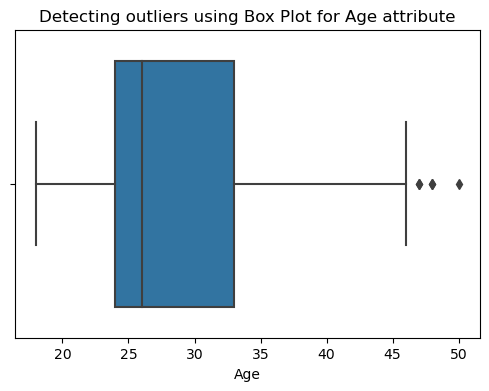

In [42]:
# Set up the matplotlib figure
plt.figure(figsize=(6, 4))

# Create a box plot for the 'Age' column
sns.boxplot(x=df['Age'])
plt.title('Detecting outliers using Box Plot for Age attribute')
plt.show()

**6.3 Detecting Outliers using Box Plot for Education attribute**

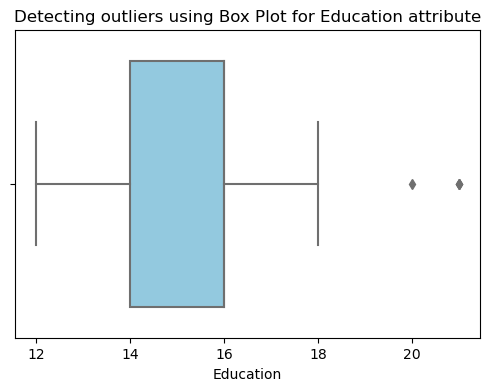

In [43]:
# Set up the matplotlib figure
plt.figure(figsize=(6, 4))

# Create a box plot for the 'Education' column
sns.boxplot(x=df['Education'], color='skyblue')
plt.title('Detecting outliers using Box Plot for Education attribute')
plt.show()

**6.4 Detecting Outliers using Box Plot for Fitness attribute**

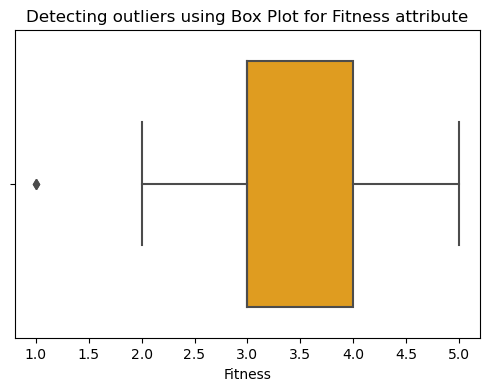

In [7]:
# Set up the matplotlib figure
plt.figure(figsize=(6, 4))

# Create a box plot for the 'Fitness' column
sns.boxplot(x=df['Fitness'], color='orange')
plt.title('Detecting outliers using Box Plot for Fitness attribute')
plt.show()

**6.5 Detecting Outliers using Box Plot for Income attribute**

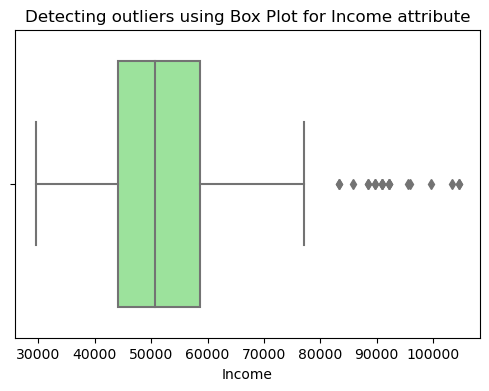

In [9]:
# Set up the matplotlib figure
plt.figure(figsize=(6, 4))

# Create a box plot for the 'Income' column
sns.boxplot(x=df['Income'], color='lightgreen')
plt.title('Detecting outliers using Box Plot for Income attribute')
plt.show()

**6.6 Detecting Outliers using Box Plot for Miles attribute**

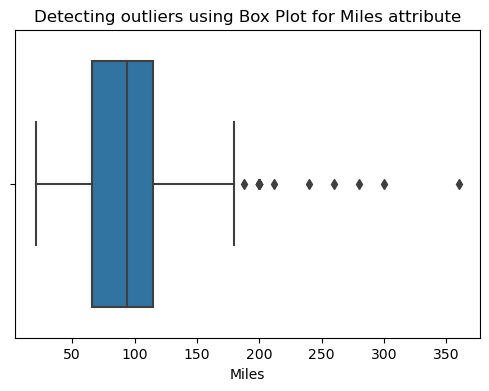

In [46]:
# Set up the matplotlib figure
plt.figure(figsize=(6, 4))

# Create a box plot for the 'Miles' column
sns.boxplot(x=df['Miles'])
plt.title('Detecting outliers using Box Plot for Miles attribute')
plt.show()

**6.7 Detecting Outliers using Box Plot for Usage attribute**

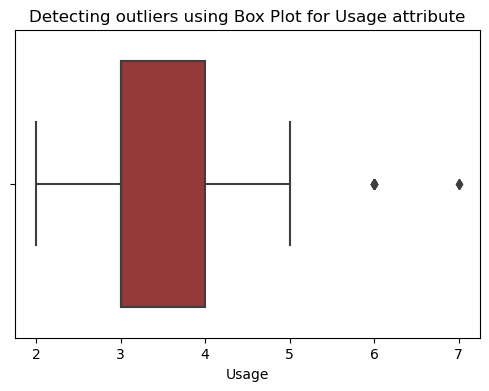

In [47]:
# Set up the matplotlib figure
plt.figure(figsize=(6, 4))

# Create a box plot for the 'Usage' column
sns.boxplot(x=df['Usage'], color='brown')
plt.title('Detecting outliers using Box Plot for Usage attribute')
plt.show()

# 7. Customer Profiling - Categorization of users

**7.1 Customer profiling involves categorizing users based on certain characteristics to better understand and target specific customer segments. We have considered creating segments based on usage patterns and fitness levels.**

### <u>Insight</u>: Most of our customers are active, moderate fitness users, followed by casual users and athletes.

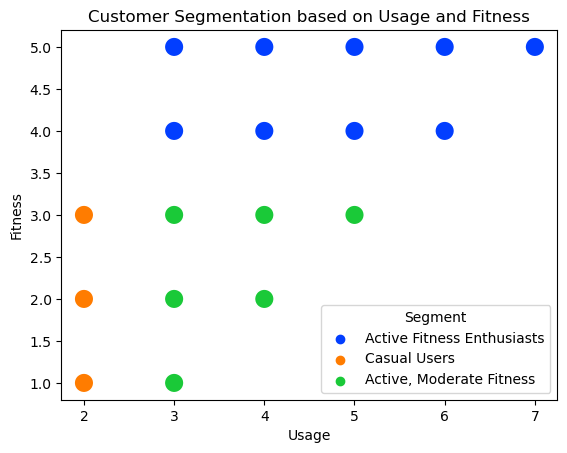


Segment Analysis:
                      Segment  Avg_Usage  Std_Usage  Avg_Fitness  Std_Fitness  \
0  Active Fitness Enthusiasts   4.436364   1.067424     4.563636     0.500505   
1    Active, Moderate Fitness   3.391304   0.533628     2.847826     0.390401   
2                Casual Users   2.000000   0.000000     2.515152     0.565752   

   Customer_Count  
0              55  
1              92  
2              33  


In [21]:
# Create segments based on Usage and Fitness
# We can customize these criteria based on your business goals
df['Segment'] = 'Undecided'
df.loc[(df['Usage'] >= 3) & (df['Fitness'] >= 4), 'Segment'] = 'Active Fitness Enthusiasts'
df.loc[(df['Usage'] >= 3) & (df['Fitness'] < 4), 'Segment'] = 'Active, Moderate Fitness'
df.loc[df['Usage'] < 3, 'Segment'] = 'Casual Users'

# Visualize the segments
plt.figure()
sns.scatterplot(x='Usage', y='Fitness', hue='Segment', data=df, palette='bright', s=200)
plt.title('Customer Segmentation based on Usage and Fitness')
plt.show()

# Analyze the segments
segment_analysis = df.groupby('Segment').agg({
    'Usage': ['mean', 'std'],
    'Fitness': ['mean', 'std'],
    'Product': 'count'
}).reset_index()

segment_analysis.columns = ['Segment', 'Avg_Usage', 'Std_Usage', 'Avg_Fitness', 'Std_Fitness', 'Customer_Count']

print("\nSegment Analysis:")
print(segment_analysis)

**7.2 Customer Profiles for Each Product**

In [22]:
# Filter the DataFrame for each product
kp281_data = df[df['Product'] == 'KP281']
kp481_data = df[df['Product'] == 'KP481']
kp781_data = df[df['Product'] == 'KP781']

# Define a function to calculate customer profiles
def calculate_customer_profile(data, product_name):
    avg_age = data['Age'].mean()
    avg_usage = data['Usage'].mean()
    avg_fitness = data['Fitness'].mean()
    avg_income = data['Income'].mean()
    avg_miles = data['Miles'].mean()
    customer_count = len(data)
    
    return {
        'Product': product_name,
        'Avg_Age': avg_age,
        'Avg_Usage': avg_usage,
        'Avg_Fitness': avg_fitness,
        'Avg_Income': avg_income,
        'Avg_Miles': avg_miles,
        'Customer_Count': customer_count
    }

# Calculate customer profiles for each product
kp281_profile = calculate_customer_profile(kp281_data, 'KP281')
kp481_profile = calculate_customer_profile(kp481_data, 'KP481')
kp781_profile = calculate_customer_profile(kp781_data, 'KP781')

# Create a DataFrame with the profiles
product_profiles = pd.DataFrame([kp281_profile, kp481_profile, kp781_profile])

print("\nCustomer Profiles for Each Product:")
print(product_profiles)



Customer Profiles for Each Product:
  Product  Avg_Age  Avg_Usage  Avg_Fitness  Avg_Income   Avg_Miles  \
0   KP281    28.55   3.087500       2.9625   46418.025   82.787500   
1   KP481    28.90   3.066667       2.9000   48973.650   87.933333   
2   KP781    29.10   4.775000       4.6250   75441.575  166.900000   

   Customer_Count  
0              80  
1              60  
2              40  


**7.3 Descriptive Analytics - Customer Profile for Age**

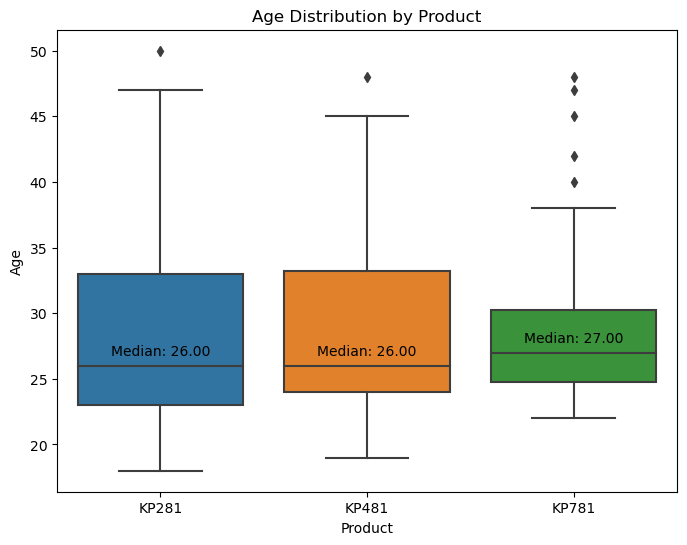

In [26]:
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='Product', y='Age', data=df)
plt.title('Age Distribution by Product')

# Add annotations for median values
for product in df['Product'].unique():
    y_values = df[df['Product'] == product]['Age']
    median_val = y_values.median()

    plt.annotate(f'Median: {median_val:.2f}',
                 xy=(df['Product'].unique().tolist().index(product), median_val),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom')
plt.show()

**7.4 Descriptive Analytics - Customer Profile for Gender**

### <u>Insight</u>: We note that there are very less female customers buying KP781 as compared to KP281 and KP481.

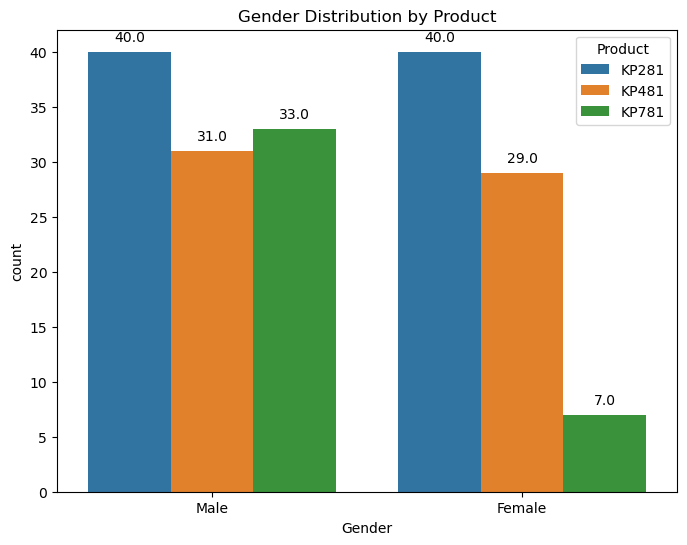

In [50]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Gender', hue='Product', data=df)

# Annotate bars with count values
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Gender Distribution by Product')
plt.show()

**7.5 Descriptive Analytics - Customer Profile for Education**

### <u>Insight</u>: We note that we have more educated customers buying KP781 as compared to KP281 and KP481.

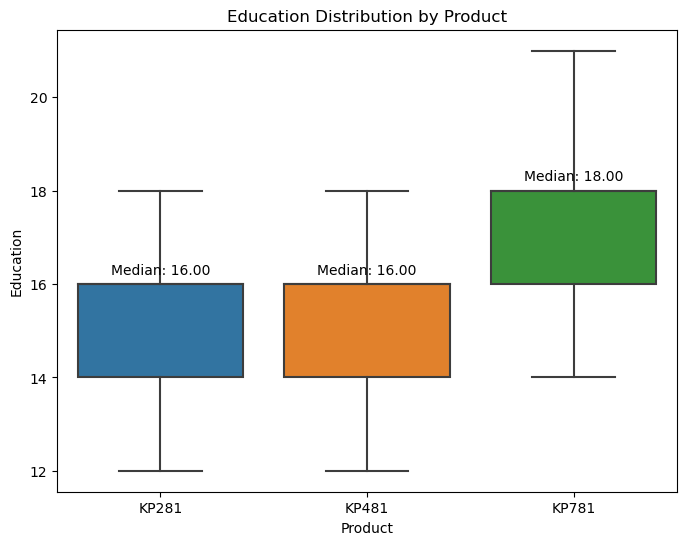

In [51]:
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='Product', y='Education', data=df)
plt.title('Education Distribution by Product')

# Add annotations for median values
for product in df['Product'].unique():
    y_values = df[df['Product'] == product]['Education']
    median_val = y_values.median()

    plt.annotate(f'Median: {median_val:.2f}',
                 xy=(df['Product'].unique().tolist().index(product), median_val),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom')

plt.show()

**7.6 Descriptive Analytics - Customer Profile for Marital Status**

### <u>Insight</u>: We note that married customers are buying all three products more as compared to single customers.

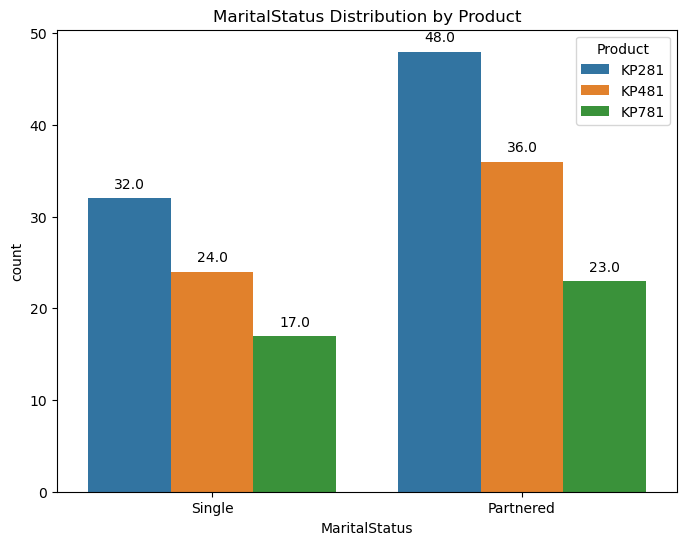

In [52]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x = 'MaritalStatus', hue = 'Product', data = df)
plt.title('MaritalStatus Distribution by Product')

# Annotate bars with count values
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()

**7.7 Descriptive Analytics - Customer Profile for Usage**

### <u>Insight</u>: We note that customers buying KP781 intend to use the product more regularly as compared to customers buying KP281 and KP481. We can infer that customer base of KP781 are active fitness enthusiasts or athletes.

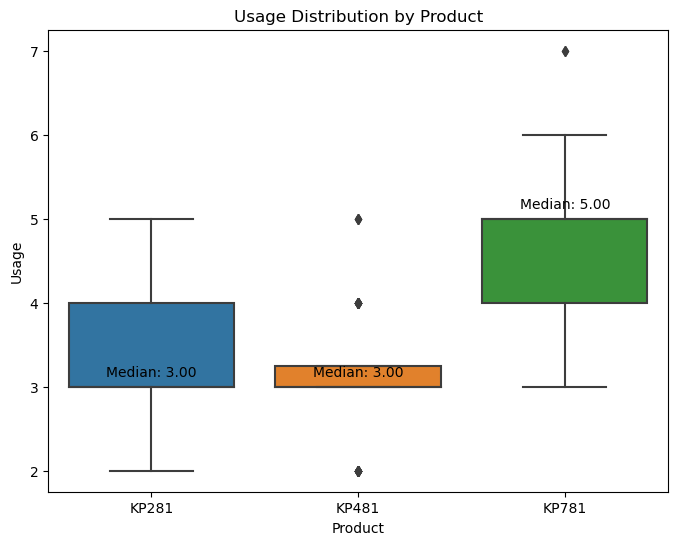

In [53]:
plt.figure(figsize = (8, 6))
ax = sns.boxplot(x = 'Product', y = 'Usage', data = df)
plt.title('Usage Distribution by Product')

# Add annotations for median values
for product in df['Product'].unique():
    y_values = df[df['Product'] == product]['Usage']
    median_val = y_values.median()

    plt.annotate(f'Median: {median_val:.2f}',
                 xy = (df['Product'].unique().tolist().index(product), median_val),
                 xytext = (0, 5),
                 textcoords = 'offset points',
                 ha = 'center', va = 'bottom')

plt.show()

**7.8 Descriptive Analytics - Customer Profiles for KP281 based on gender and marital status**

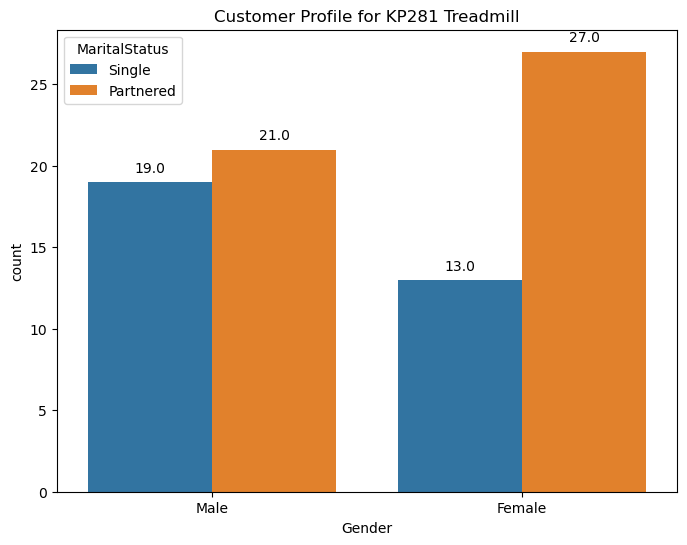

In [65]:
# Filter data for KP281 treadmills
df_kp281 = df[df['Product'] == 'KP281']

plt.figure(figsize = (8, 6))
ax = sns.countplot(x = 'Gender', hue = 'MaritalStatus', data = df_kp281)

# Annotate the bars with their respective counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.title('Customer Profile for KP281 Treadmill')
plt.show()

**7.9 Descriptive Analytics - Customer Profiles for KP281 based on income**

### <u>Insight</u>: We note that most customers buying KP281 fall under 25,000 - 50,000 dollars annual income bracket. So, if we offer them some discounts or offers, they can shift to KP481.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2996\428754364.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kp281['IncomeRange'] = pd.cut(df_kp281['Income'], bins=income_bins, labels=income_labels, right=False)


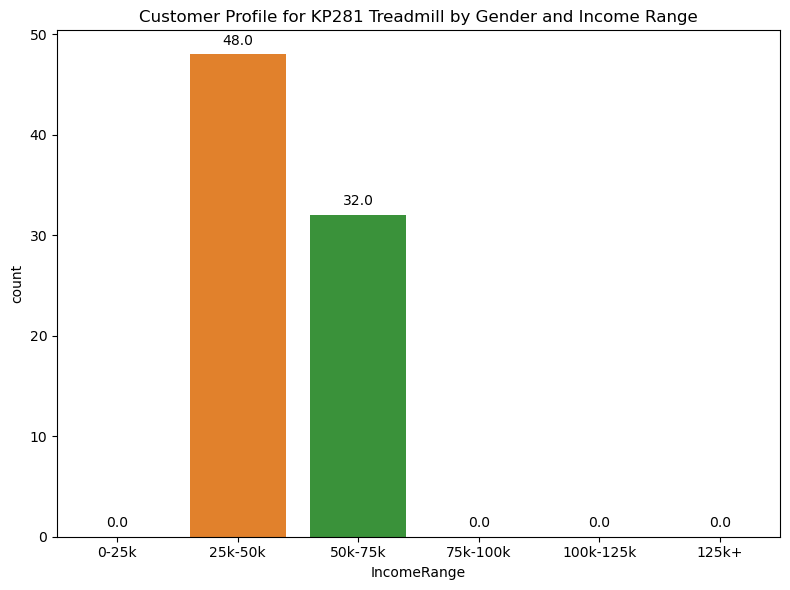

In [56]:
# Filter data for KP481 treadmills
df_kp281 = df[df['Product'] == 'KP281']

# Define income bins
income_bins = [0, 25000, 50000, 75000, 100000, 125000, np.inf]
income_labels = ['0-25k', '25k-50k', '50k-75k', '75k-100k', '100k-125k', '125k+']

# Bin the income data
df_kp281['IncomeRange'] = pd.cut(df_kp281['Income'], bins=income_bins, labels=income_labels, right=False)

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='IncomeRange', data=df_kp281, order=income_labels)

# Annotate the bars with their respective counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.title('Customer Profile for KP281 Treadmill by Gender and Income Range')
plt.tight_layout()
plt.show()

**7.10 Descriptive Analytics - Customer Profiles for KP481 based on gender and marital status**

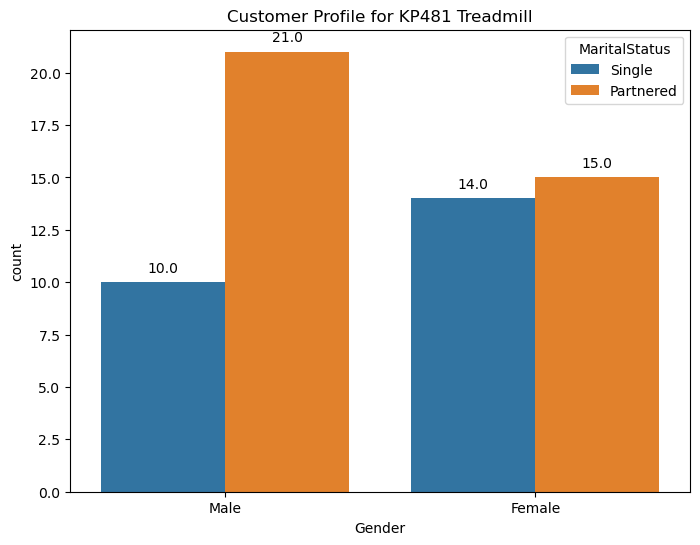

In [49]:
# Filter data for KP281 treadmills
df_kp481 = df[df['Product'] == 'KP481']

plt.figure(figsize = (8, 6))
ax = sns.countplot(x = 'Gender', hue = 'MaritalStatus', data = df_kp481)

# Annotate the bars with their respective counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.title('Customer Profile for KP481 Treadmill')
plt.show()

**7.11 Descriptive Analytics - Customer Profiles for KP481 based on income**

### <u>Insight</u>: We note that 50% customers buying KP481 fall under 50,000 - 75,000 dollars annual income bracket. So, if we offer them some discounts or offers, they can shift to KP781.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2996\3408367039.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kp481['IncomeRange'] = pd.cut(df_kp481['Income'], bins=income_bins, labels=income_labels, right=False)


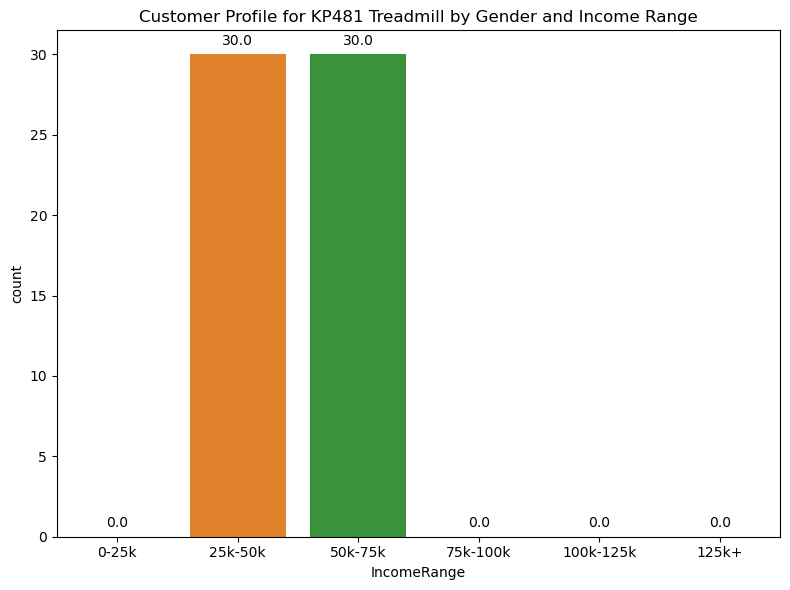

In [55]:
# Filter data for KP481 treadmills
df_kp481 = df[df['Product'] == 'KP481']

# Define income bins
income_bins = [0, 25000, 50000, 75000, 100000, 125000, np.inf]
income_labels = ['0-25k', '25k-50k', '50k-75k', '75k-100k', '100k-125k', '125k+']

# Bin the income data
df_kp481['IncomeRange'] = pd.cut(df_kp481['Income'], bins=income_bins, labels=income_labels, right=False)

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='IncomeRange', data=df_kp481, order=income_labels)

# Annotate the bars with their respective counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.title('Customer Profile for KP481 Treadmill by Gender and Income Range')
plt.tight_layout()
plt.show()

**7.12 Descriptive Analytics - Customer Profiles for KP781 based on gender and marital status**

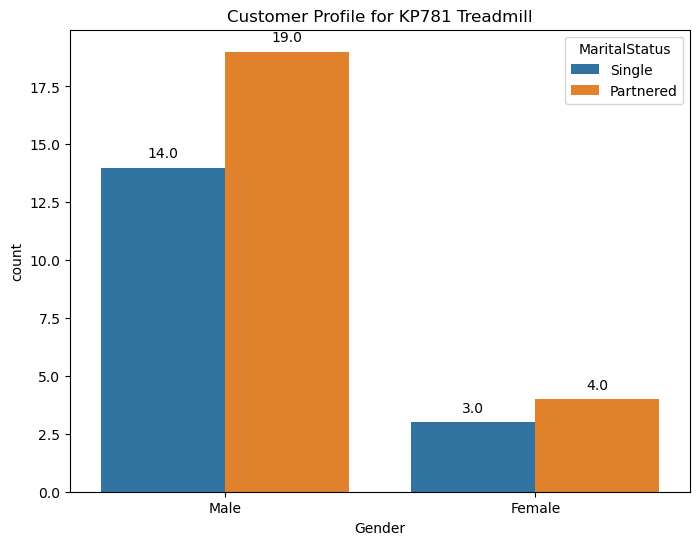

In [63]:
# Filter data for KP781 treadmills
df_kp781 = df[df['Product'] == 'KP781']

plt.figure(figsize = (8, 6))
ax = sns.countplot(x = 'Gender', hue = 'MaritalStatus', data = df_kp781)

# Annotate the bars with their respective counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.title('Customer Profile for KP781 Treadmill')
plt.show()

**7.13 Descriptive Analytics - Customer Profiles for KP781 based on income**

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2996\3401997708.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kp781['IncomeRange'] = pd.cut(df_kp781['Income'], bins=income_bins, labels=income_labels, right=False)


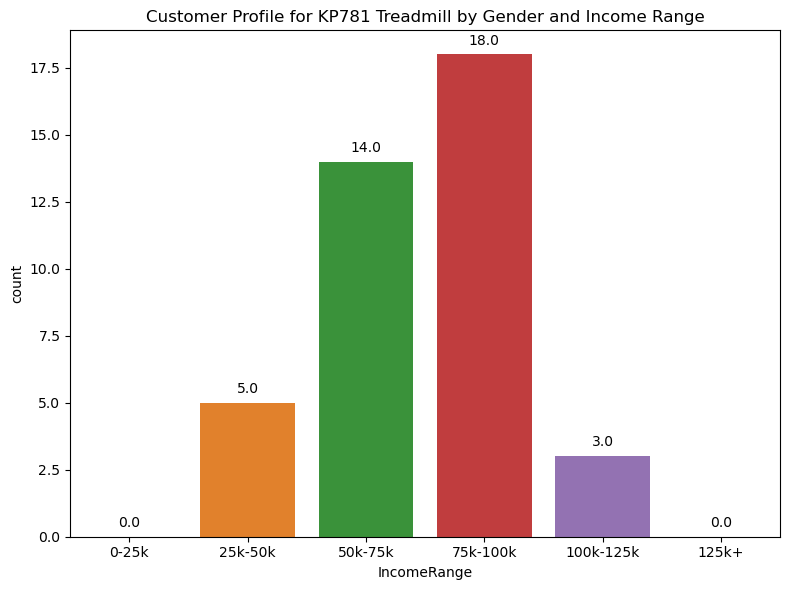

In [57]:
# Filter data for KP481 treadmills
df_kp781 = df[df['Product'] == 'KP781']

# Define income bins
income_bins = [0, 25000, 50000, 75000, 100000, 125000, np.inf]
income_labels = ['0-25k', '25k-50k', '50k-75k', '75k-100k', '100k-125k', '125k+']

# Bin the income data
df_kp781['IncomeRange'] = pd.cut(df_kp781['Income'], bins=income_bins, labels=income_labels, right=False)

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='IncomeRange', data=df_kp781, order=income_labels)

# Annotate the bars with their respective counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.title('Customer Profile for KP781 Treadmill by Gender and Income Range')
plt.tight_layout()
plt.show()

# 8. Business recommedations

### <u>8.1 Customer Engagement:</u>
1. **We should focus on age-specific marketing campaigns to target and engage customers in the 20-35 age range, as this group shows highest interest in all our treadmills.** 
2. **Most of our KP281 and KP481 treadmill customers fall in 20-35 age range whereas our KP781 treadmill customers fall in 25-30 age range.**
3. **Average age of our customers is 28.79 years and median age is 26.0 years.**
4. **We should also focus on marketing campaigns to target and engage married customers as they are more than single customers.**
5. **For our KP781, we have very less female customers, so we can introduce some deals or discounts so that more females who are atletes but our KP781.**

### <u>8.2 Focus on each treadmill model:</u>
1. **We must focus on treadmill-model-specific marketing campaigns to target and engage customers of each model.** 
2. **44.44% of our customers are KP281 buyers, 33.33% are KP481 buyers and 22.22% are KP781 buyers.** 
3. **Whereas generally customers of KP781 (which is our highest priced product) are having more than 50,000 dollars annual income and are mostly active fitness enthusiasts or athletes.** 
4. **So we have balanced customer base for each treadmill model, and therfore marketing and attention to each treadmill model is equally important.**  

### <u>8.3 Promote Fitness Features:</u>
1. **We must consider developing and promoting treadmill features that cater to customers with fitness levels of 3 or more, as they represent a significant portion of the market.** 
2. **Most of our consumers have moderate to high level of fitness.**
3. **For our KP781 model, buyers are mostly athletes or active fitness enthusiasts, so we can promote our KP781 model's features more to such cutomers so that its sales can increase.**

### <u>8.4 Advertise Usage Scenarios:</u>
1. **We can create promotional materials highlighting the durability and features suitable for customers planning to use treadmills intensively (Usage level 3 or more).** 
2. **Most of our consumers intend to use treadmill 3 times a week or more.**

### <u>8.5 Affordability Awareness:</u>
1. **We need to leverage messaging that emphasizes affordability to appeal to customers with incomes of 50,000 dollars or more, ensuring they are aware of the budget-friendly options available.** 
2. **Most of our KP281 and KP481 treadmill consumers fall in 40,000 - 60,000 dollars annual income bracket, but our KP781 treadmill customers fall in 60,000 - 90,000 dollars annual income bracket.**
3. **We note that most customers buying KP281 fall under 25,000 - 50,000 dollars annual income bracket. So, if we offer them some discounts or offers, they can shift to KP481.**
4. **We note that 50% customers buying KP481 fall under 50,000 - 75,000 dollars annual income bracket. So, if we offer them some discounts or offers, they can shift to KP781.**

### <u>8.6 Inclusive Marketing:</u>
1. **We must ensure that our marketing materials represent and speak to both genders, acknowledging the fact that we have a diverse customer base in terms of gender.**
2. **We can focus more on sales to female customers because they are little less in number than male customers.**

### <u>8.7 Personalized Recommendations:</u>
**We can implement a recommendation system or personalized customer outreach to suggest treadmills based on individual preferences and needs.**